In [1]:
import pandas as pd
import matplotlib
from sklearn import preprocessing
%matplotlib inline


In [2]:
df = pd.read_csv('raw.csv')
df

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location,full_play_type,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
0,3593,0.58,1.0,2,pass,short,left,unknown,pass_left,0,1,0,0,0,0,0,1,0,0
1,3556,0.53,2.0,1,run,unknown,unknown,right,run_right,5,0,1,0,0,0,1,0,0,0
2,3515,0.56,3.0,1,pass,deep,right,unknown,pass_right,2,0,0,1,0,0,1,0,0,0
3,3496,0.98,1.0,2,run,unknown,unknown,middle,run_middle,4,1,0,0,0,0,0,1,0,0
4,3460,0.98,2.0,2,pass,short,left,unknown,pass_left,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305161,82,0.71,2.0,0,pass,short,right,unknown,pass_right,2,0,1,0,0,1,0,0,0,0
305162,77,0.71,3.0,0,pass,short,middle,unknown,pass_middle,1,0,0,1,0,1,0,0,0,0
305163,63,0.66,2.0,2,pass,short,middle,unknown,pass_middle,1,0,1,0,0,0,0,1,0,0
305164,58,0.66,3.0,2,pass,short,middle,unknown,pass_middle,1,0,0,1,0,0,0,1,0,0


In [9]:
df.shape

(305166, 19)

In [11]:
df.keys()

Index(['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo',
       'play_type', 'pass_length', 'pass_location', 'run_location',
       'full_play_type', 'full_play_type_code', 'down_1.0', 'down_2.0',
       'down_3.0', 'down_4.0', 'ydstogo_0', 'ydstogo_1', 'ydstogo_2',
       'ydstogo_3', 'ydstogo_4'],
      dtype='object')

In [18]:
#filter rows
nedf = df[(df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.play_type=='run') | (df.play_type == 'pass'))]#filter columns
nedf = nedf[['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo', 'play_type', 'pass_length', 'pass_location', 'run_location','full_play_type']]
nedf

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location,full_play_type
0,3593,0.58,1.0,2,pass,short,left,unknown,pass_left
1,3556,0.53,2.0,1,run,unknown,unknown,right,run_right
2,3515,0.56,3.0,1,pass,deep,right,unknown,pass_right
3,3496,0.98,1.0,2,run,unknown,unknown,middle,run_middle
4,3460,0.98,2.0,2,pass,short,left,unknown,pass_left
...,...,...,...,...,...,...,...,...,...
305161,82,0.71,2.0,0,pass,short,right,unknown,pass_right
305162,77,0.71,3.0,0,pass,short,middle,unknown,pass_middle
305163,63,0.66,2.0,2,pass,short,middle,unknown,pass_middle
305164,58,0.66,3.0,2,pass,short,middle,unknown,pass_middle


In [19]:
# import numpy as np
# def get_full_play_type(play):
#     play_type, pass_location, run_location = play
#     if(play_type == 'run'):
#         return play_type+'_'+ run_location
#     else:
#         return play_type+'_'+ pass_location
# nedf = nedf.replace(np.nan, 'unknown', regex=True)    
# nedf['full_play_type'] = nedf[['play_type','pass_location', 'run_location']].apply(get_full_play_type, axis=1)
# nedf = nedf[(nedf.full_play_type.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]
# nedf

In [21]:
nedf.groupby(['full_play_type']).count()[['play_type']]

,play_type
full_play_type,
pass_left,62909
pass_middle,40840
pass_right,70110
run_left,47691
run_middle,36386
run_right,47230


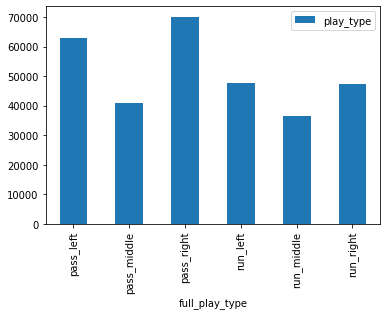

In [22]:
nedf.groupby(['full_play_type']).count()[['play_type']].plot(kind='bar')

In [23]:
nedf.groupby(['full_play_type']).count()[['play_type']].apply(lambda x:100 * x / float(x.sum()))

,play_type
full_play_type,
pass_left,20.614682
pass_middle,13.382880
pass_right,22.974381
run_left,15.627888
run_middle,11.923347
run_right,15.476822


In [24]:
le = preprocessing.LabelEncoder()
le.fit(nedf.full_play_type)
nedf['full_play_type_code'] = le.transform(nedf['full_play_type'])

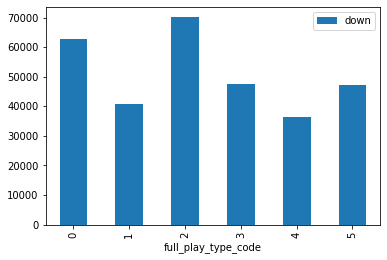

In [25]:
nedf.groupby(['full_play_type_code']).count()[['down']].plot(kind='bar')

In [27]:
# def bucketize(val, size, count):
#     i=0
#     for i in range(count):
#         if val <= (i+1)*size:
#             return i
#     return idef bucketize_df(df):
#     df['ydstogo'] = [bucketize(x, 4, 5) for x in df['ydstogo']]
#     return dfnedf = bucketize_df(nedf)

In [28]:
nedf = pd.concat([nedf, pd.get_dummies(nedf['down'], prefix='down')], axis=1)
nedf = pd.concat([nedf, pd.get_dummies(nedf['ydstogo'], prefix='ydstogo')], axis=1)

In [29]:
nedf

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location,full_play_type,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
0,3593,0.58,1.0,2,pass,short,left,unknown,pass_left,0,1,0,0,0,0,0,1,0,0
1,3556,0.53,2.0,1,run,unknown,unknown,right,run_right,5,0,1,0,0,0,1,0,0,0
2,3515,0.56,3.0,1,pass,deep,right,unknown,pass_right,2,0,0,1,0,0,1,0,0,0
3,3496,0.98,1.0,2,run,unknown,unknown,middle,run_middle,4,1,0,0,0,0,0,1,0,0
4,3460,0.98,2.0,2,pass,short,left,unknown,pass_left,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305161,82,0.71,2.0,0,pass,short,right,unknown,pass_right,2,0,1,0,0,1,0,0,0,0
305162,77,0.71,3.0,0,pass,short,middle,unknown,pass_middle,1,0,0,1,0,1,0,0,0,0
305163,63,0.66,2.0,2,pass,short,middle,unknown,pass_middle,1,0,1,0,0,0,0,1,0,0
305164,58,0.66,3.0,2,pass,short,middle,unknown,pass_middle,1,0,0,1,0,0,0,1,0,0


In [34]:
# nedf.describe()
nedf.dtypes

game_seconds_remaining     object
yardline_100              float64
down                      float64
ydstogo                     int64
play_type                  object
pass_length                object
pass_location              object
run_location               object
full_play_type             object
full_play_type_code         int32
down_1.0                    uint8
down_2.0                    uint8
down_3.0                    uint8
down_4.0                    uint8
ydstogo_0                   uint8
ydstogo_1                   uint8
ydstogo_2                   uint8
ydstogo_3                   uint8
ydstogo_4                   uint8
dtype: object

In [35]:
# nedf['game_seconds_remaining']/=3600
# nedf['yardline_100']/=100
# nedf['score_differential']=(nedf['score_differential']+50)/100

In [38]:
from sklearn.model_selection import train_test_split#select important columns for input
X=nedf[['yardline_100', 'game_seconds_remaining', 'down_1.0', 'down_2.0', 'down_3.0', 'down_4.0','ydstogo_0','ydstogo_1','ydstogo_2','ydstogo_3','ydstogo_4']]#select result column for output
Y=nedf['full_play_type_code']#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 0)

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# the_clf=RandomForestClassifier(max_depth=8, n_estimators=64)
# the_clf.fit(train_x, train_y)

In [42]:
# from sklearn.metrics import accuracy_score
# pred = the_clf.predict(test_x)
# acc =accuracy_score(test_y, pred)
# print(acc)